In [75]:
import pandas as pd
df=pd.read_csv("https://github.com/campusx-official/100-days-of-machine-learning/raw/refs/heads/main/day30-function-transformer/train.csv")


In [76]:

import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [77]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [78]:
df=df[["Age","Fare","Survived"]]
df.head()

,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0


In [79]:
df.isnull().sum()

Age         177
Fare          0
Survived      0
dtype: int64

In [80]:
df["Age"].fillna(df["Age"].mean(),inplace=True)

C:\Users\pc\AppData\Local\Temp\ipykernel_23944\2595122914.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].mean(),inplace=True)


In [81]:
df.isnull().sum()

Age         0
Fare        0
Survived    0
dtype: int64

In [82]:
df.shape

(891, 3)

## train test split

In [83]:
X=df.iloc[:,:2]
y=df.iloc[:,-1]
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [84]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [85]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((712, 2), (179, 2), (712,), (179,))

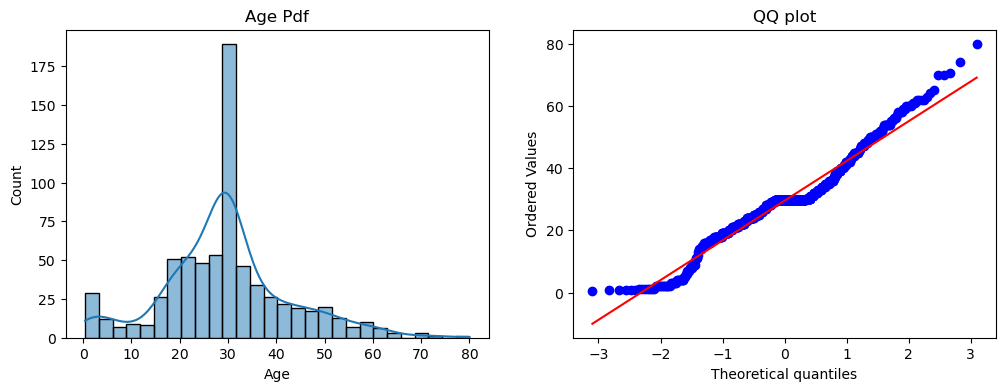

In [86]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(X_train["Age"],kde=True)
plt.title("Age Pdf")

plt.subplot(1,2,2)
stats.probplot(X_train["Age"],dist="norm",plot=plt)
plt.title("QQ plot")

plt.show()


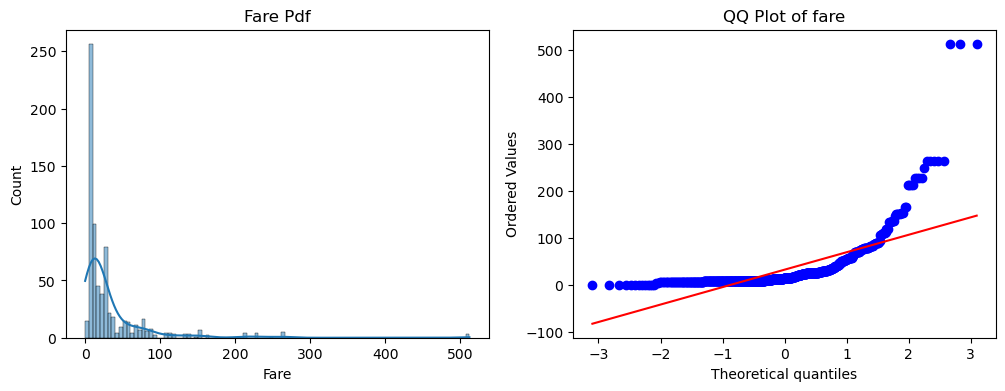

In [87]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(X_train["Fare"],kde=True)
plt.title("Fare Pdf")

plt.subplot(1,2,2)
stats.probplot(X_train["Fare"],dist="norm",plot=plt)
plt.title("QQ Plot of fare")

plt.show()

## Train Model without using function transfromer

In [88]:
clf1=LogisticRegression()
clf2=DecisionTreeClassifier()

In [89]:
clf1.fit(X_train,y_train)
clf2.fit(X_train,y_train)
y_pred=clf1.predict(X_test)
y_pred1=clf2.predict(X_test)
print("Accuracy Clf1",accuracy_score(y_test,y_pred))
print("Accuracy Clf2",accuracy_score(y_test,y_pred1))


Accuracy Clf1 0.6480446927374302
Accuracy Clf2 0.6927374301675978


## Using function transformer

In [90]:
trf=FunctionTransformer(func=np.log1p)


In [91]:
X_train_transformed=trf.fit_transform(X_train)
X_test_transformed=trf.fit_transform(X_test)


In [92]:
clf1=LogisticRegression()
clf2=DecisionTreeClassifier()
clf1.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)
y_pred=clf1.predict(X_test_transformed)
y_pred1=clf2.predict(X_test_transformed)

print("accuracy clf1",accuracy_score(y_test,y_pred))
print("accuracy clf2",accuracy_score(y_test,y_pred1))

accuracy clf1 0.6815642458100558
accuracy clf2 0.664804469273743


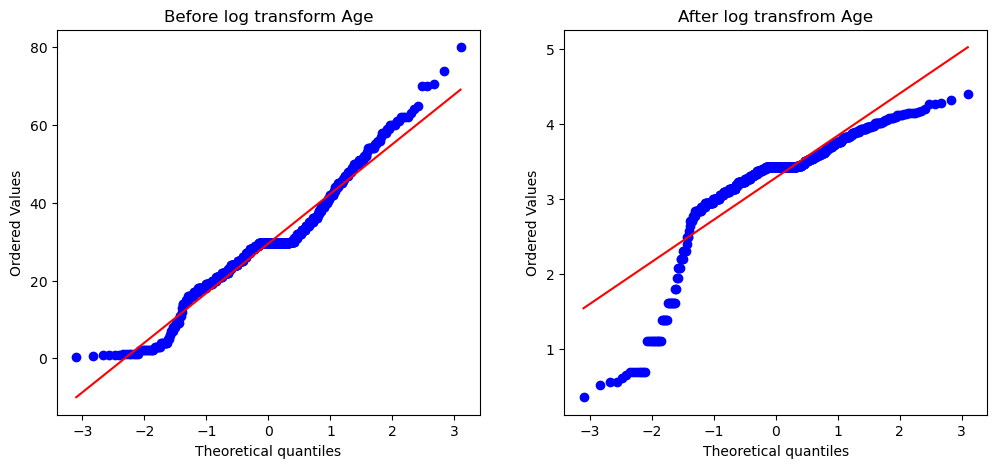

In [96]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
stats.probplot(X_train["Age"],dist="norm",plot=plt)
plt.title("Before log transform Age")

plt.subplot(1,2,2)
stats.probplot(X_train_transformed["Age"],dist="norm",plot=plt)
plt.title("After log transfrom Age")
plt.show()


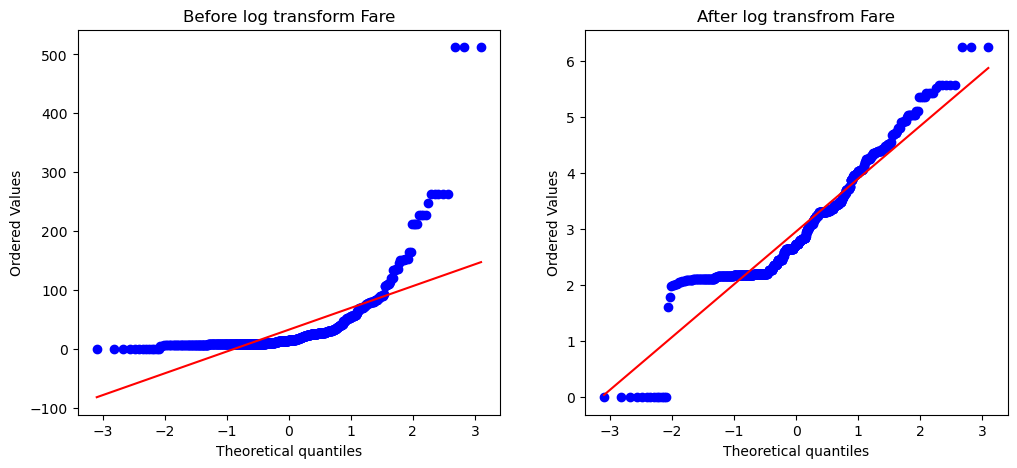

In [94]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
stats.probplot(X_train["Fare"],dist="norm",plot=plt)
plt.title("Before log transform Fare")

plt.subplot(1,2,2)
stats.probplot(X_train_transformed["Fare"],dist="norm",plot=plt)
plt.title("After log transfrom Fare")
plt.show()

In [72]:
# using log transform only fare
trf2=ColumnTransformer([
    ("log",FunctionTransformer(np.log1p),["Fare"])
],remainder='passthrough')

X_train_transformed2=trf2.fit_transform(X_train)
X_test_transformed2=trf2.transform(X_test)

In [95]:

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed2,y_train)
clf2.fit(X_train_transformed2,y_train)
    
y_pred = clf.predict(X_test_transformed2)
y_pred2 = clf2.predict(X_test_transformed2)
    
print("Accuracy clf",accuracy_score(y_test,y_pred))
print("Accuracy clf2",accuracy_score(y_test,y_pred2))

Accuracy clf 0.6703910614525139
Accuracy clf2 0.6871508379888268
